# **공공데이터 API**

## **💊 국립 중앙 의료원 전국 약국정보 조회 서비스**
- 제공 사이트 : https://www.data.go.kr/data/15082972/fileData.do
- 연결 url : http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire

In [1]:
# 패키지 임포트
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# 인증 정보 
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire'
servicekey = 'A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D'

### **🔸'서울특별시 강남구'에 있는 '삼성약국'을 조회해보자**

In [3]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
QT = '1' # 약국 영업 요일
QN = quote('삼성약국') # 검색하고자 하는 약국의 이름
ORD = 'NAME' # 정렬기준
numOfRows = '10' # 추출 데이터 목록 건수 

In [4]:
# 파라미터 생성
paramset = '?servicekey='+servicekey + \
            '&QT='+QT + \
            '&QN='+QN + \
            '&Q0='+Q0 + \
            '&Q1='+Q1 + \
            '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [5]:
# paramset과 endpoint 붙혀서 URL 생성
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?servicekey=A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&ORD=NAME&numOfRows=10'

In [6]:
# URL 요청 및 bs4 객체 생성
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')
bs_obj

/Users/euijinlee/.pyenv/versions/3.10.10/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><dutyaddr>서울특별시 강남구 일원로 53 (일원동) </dutyaddr><dutymapimg>소림빌딩 1층</dutymapimg><dutyname>E-삼성약국</dutyname><dutytel1>02-3412-1254</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>1900</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>1900</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104799</hpid><postcdn1>063</postcdn1><postcdn2>43 </postcdn2><rnum>1</rnum><wgs84lat>37.48926299528938</wgs84lat><wgs84lon>127.08181088280385</wgs84lon></item><item><dutyaddr>서울특별시 강남구 일원로 45, 대훈빌딩 1층 (일원동)</dutyaddr><dutymapimg>대청역 4번출구에서 423m</dutymapimg><dutyname>무지개삼성약국</dutyname><dutytel1>02-2226-5467</dutytel1><dutytime1c>1900</dutyti

In [7]:
# 'item' 으로 분리되어 있는 것을 확인 
print('서울특별시 강남구 삼성약국 갯수: ', len(bs_obj.findAll('item')))
print('첫번째 삼성약국의 이름: ', bs_obj.findAll('item')[0].dutyname.text)

서울특별시 강남구 삼성약국 갯수:  4
첫번째 삼성약국의 이름:  E-삼성약국


### **🔸'서울특별시'에 있는 '삼성약국'을 조회해보자**

In [8]:
# 변수명과 파라미터명 매칭시켜서 파라미터 값 설명
Q0 = quote('서울특별시') # 광역시도
Q1 = quote('강남구') # 시군구
QT = '1' # 약국 영업 요일
QN = quote('삼성약국') # 검색하고자 하는 약국의 이름
ORD = 'NAME' # 정렬기준
numOfRows = '6000' # 추출 데이터 목록 건수 

In [9]:
# 파라미터 생성
paramset = '?servicekey='+servicekey + \
            '&QN='+QN + \
            '&Q0='+Q0 + \
            '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [10]:
# paramset과 endpoint 붙혀서 URL 생성
url = endpoint + paramset

In [11]:
# URL 요청 및 bs4 객체 생성
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')

In [12]:
# 'item' 으로 분리되어 있는 것을 확인 
res_fin = bs_obj.find_all('item')
print('서울특별시 삼성약국 갯수: ', len(res_fin))

서울특별시 삼성약국 갯수:  17


### **🔸서울시의 '모든 약국' 정보를 추출해보자**

In [13]:
# 파라미터 생성
paramset = '?servicekey='+servicekey + \
            '&Q0='+Q0 + \
            '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [14]:
# paramset과 endpoint 붙혀서 URL 생성
url = endpoint + paramset

In [15]:
# URL 요청 및 bs4 객체 생성
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')

In [16]:
# 'item' 으로 분리되어 있는 것을 확인 
res_fin = bs_obj.find_all('item')
print('서울시의 모든 약국 갯수: ', len(res_fin))

서울시의 모든 약국 갯수:  5407


In [17]:
# name - [item.dutyname.text for item in res_fin]
# address - [item.dutyaddr.text for item in res_fin]
# tel - [item.dutytel1.text for item in res_fin]

In [18]:
# 서울시의 약국정보 data df로 저장
name = [item.dutyname.text for item in res_fin]
addr = [item.dutyaddr.text for item in res_fin]
tel = [item.dutytel1.text for item in res_fin]

df_fin = pd.DataFrame({'약국명':name, '주소':addr, '전화번호':tel})
df_fin.tail()

약국명                                             주소          전화번호
5402  힐스테이트솔약국  서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)  02-2695-6121
5403      힘찬약국       서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)   02-996-9114
5404      힘찬약국         서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)  02-2279-7588
5405      힘찬약국                  서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)   02-454-1221
5406      힘챤약국                            서울특별시 성북구 보국문로 16-1   02-942-2088

In [19]:
# 저장
df_fin.to_csv('./crawl_data/서울시_약국정보.csv')

### **🔸서울시의 약국 중 '월요일 야간'에 운영하는 약국 정보를 추출해보자**
- '야간'의 기준 : 오후 9시 이후

In [20]:
# 첫번째 약국에 대해 시간정보 확인해보기 
# res_fin[0] => dutytime1c, dutytime1s, dutytime2c, dutytime2s ..
# dutytime*c = close
# dutytime*s = start 
# * = 1,2,3,4,5,6 = 월,화,수,목,금,토 로 추정

# 월요일 영업 종료시간이 21:00분 이후인지 확인
# 월요일 종료 시간 태그 = <dutytime1c>
int(res_fin[0].dutytime1c.text) > 2100

False

In [21]:
name = []
adr = []
tel = []
cl_time = []
count = 0

for item in res_fin :
    tmp_time = item.find('dutytime1c')
    # 월요일 휴무인 약국은 태그가 없을 수 있음
    if tmp_time != None :
        c_time = int(tmp_time.text)
        if c_time > 2100 :
            count = count + 1
            name.append(item.find('dutyname').text)
            adr.append(item.find('dutyaddr').text)
            tel.append(item.find('dutytel1').text)
            cl_time.append(c_time)

In [22]:
print('월요일 야간영업 약국 갯수: ', count)
print('모든 데이터가 맞게 들어왔는지 확인: ', len(name), len(adr), len(tel), len(cl_time))

월요일 야간영업 약국 갯수:  752
모든 데이터가 맞게 들어왔는지 확인:  752 752 752 752


In [23]:
df_mon_night = pd.DataFrame({'약국명':name, '주소':adr, '전화번호':tel, '영업종료시간':cl_time})
df_mon_night

약국명                                          주소           전화번호  \
0      365강남역약국    서울특별시 강남구 강남대로 지하396, 강남역 103-104호 (역삼동)    02-554-5628   
1      365그랜드약국              서울특별시 금천구 시흥대로62길 29, 1층 (시흥동)    02-896-1223   
2       365마트약국        서울특별시 영등포구 영중로 125, 롯데마트 1층 (영등포동8가)   02-2633-4865   
3    365서초메트로약국   서울특별시 서초구 서초대로 지하233, 서초역 지하1층 106호 (서초동)   050-713-3435   
4         365약국    서울특별시 중랑구 면목로 지하407, 면목역 지하1층 108호 (면목동)   02-2208-0365   
..          ...                                         ...            ...   
747    휴베이스하이약국         서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)  070-7778-8275   
748    휴베이스하이약국         서울특별시 중구 명동9가길 14, 메트로호텔 1층 (을지로2가)  070-7798-8275   
749        흥명약국                 서울특별시 동대문구 고산자로30길 56 (용두동)    02-963-0617   
750        희망약국                 서울특별시 관악구 쑥고개로 53, 1층 (봉천동)    02-874-9488   
751        희망약국  서울특별시 노원구 동일로230가길 15, 103호 (상계동, 우방아파트상가)    02-939-9831   

     영업종료시간  
0      2300  
1      2130  
2      2200  
3      2200  
4      2230  
..      ...  
747    2200  
748    2200  
749    2300  
750    2130  
751    2200  

[752 rows x 4 columns]

In [24]:
# 저장
df_mon_night.to_csv('./crawl_data/서울시_월요일심야영업_약국정보.csv')

### **🔸서울시의 약국 중 토요일 and/or 일요일에 운영하는 약국 정보를 추출해보자**
- 약국명, 주소, 전화번호, 토요일영업여부, 일요일영업여부, 토요일종료시간, 일요일종료시간
- 토요일/일요일 영업 여부값 : Y/N

In [25]:
# 파라미터 생성
paramset = '?servicekey='+servicekey + \
            '&Q0='+Q0 + \
            '&ORD='+ORD + '&numOfRows='+numOfRows
paramset

'?servicekey=A%2FLibLzqJYxdVmaSOkiV1tEpAtMh%2BIdGZ2xguIeyP6y%2F2A2I1sePtrX8CTQTalhHj4V2SO%2F2nhAEXmMypKTBmQ%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&numOfRows=6000'

In [26]:
# paramset과 endpoint 붙혀서 URL 생성
url = endpoint + paramset

In [27]:
# URL 요청 및 bs4 객체 생성
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')

/Users/euijinlee/.pyenv/versions/3.10.10/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [28]:
# 'item' 으로 분리되어 있는 것을 확인 
res_fin = bs_obj.find_all('item')
print('서울시의 모든 약국 갯수: ', len(res_fin))

서울시의 모든 약국 갯수:  5407


In [29]:
# res_fin[0]을 예시로 코드 만들어보기 
res_fin[0]

<item><dutyaddr>서울특별시 강남구 헌릉로571길 7, 강남레체 1층 101호 (세곡동)</dutyaddr><dutyname>100세건강약국</dutyname><dutytel1>02-445-1460</dutytel1><dutytime1c>2000</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>2000</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>2000</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>2000</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>2000</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1900</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1109587</hpid><postcdn1>063</postcdn1><postcdn2>76 </postcdn2><rnum>1</rnum><wgs84lat>37.4660448664795</wgs84lat><wgs84lon>127.101366881801</wgs84lon></item>

In [30]:
# res_fin[0]을 예시로 코드 만들어보기 
# dutytime*c = close
# dutytime*s = start 
# * = 1,2,3,4,5,6 = 월,화,수,목,금,토 로 추정

# 약국명 확인 코드
res_fin[0].find('dutyname').text
# 주소 확인 코드
res_fin[0].find('dutyaddr').text
# 전화번호 확인 코드
res_fin[0].find('dutytel1').text

# 토요일 영업 하는지 여부 확인 코드 # dutytime6
if (res_fin[0].find('dutytime6s') == None) == False:
    print('Y')
    # 토요일 종료시간 확인 코드
    print(res_fin[0].find('dutytime6c').text)
else:
    print('N')

# 일요일 영업 하는지 여부 확인 코드
if (res_fin[0].find('dutytime7s') == None) == False:
    print('Y')
    # 일요일 종료시간 확인 코드
    print(res_fin[0].find('dutytime7c').text)
else:
    print('N')


Y
1900
N


In [31]:
# 약국명, 주소, 전화번호, 토요일영업여부, 일요일영업여부, 토요일종료시간, 일요일종료시간
# 모든 data에 적용 
name = []
adr = []
tel = []
open_sat = []
ctime_sat = []
open_sun = []
ctime_sun = []
count = 0

for item in res_fin :
    name.append(item.find('dutyname').text)
    adr.append(item.find('dutyaddr').text)
    tel.append(item.find('dutytel1').text)

    # 토요일 영업 하는지 여부 확인 코드 # dutytime6
    if (item.find('dutytime6s') == None) == False:
        open_sat.append('Y')
        # 토요일 종료시간 확인 코드
        ctime_sat.append(item.find('dutytime6c').text)
    else:
        open_sat.append('N')
        ctime_sat.append('N')

    # 일요일 영업 하는지 여부 확인 코드
    if (item.find('dutytime7s') == None) == False:
        open_sun.append('Y')
        # 일요일 종료시간 확인 코드
        ctime_sun.append(item.find('dutytime7c').text)
    else:
        open_sun.append('N')
        ctime_sun.append('N')
        
    count = count + 1

In [32]:
print('서울시 약국 갯수: ', count)
print('모든 데이터가 맞게 들어왔는지 확인: ', len(name), len(adr), len(tel))
print('토요일 영업 약국 갯수가 서로 맞는지 확인: ', open_sat.count('N'), ctime_sat.count('N'))
print('일요일 영업 약국 갯수가 서로 맞는지 확인: ', open_sun.count('N'), ctime_sun.count('N'))

서울시 약국 갯수:  5407
모든 데이터가 맞게 들어왔는지 확인:  5407 5407 5407
토요일 영업 약국 갯수가 서로 맞는지 확인:  221 221
일요일 영업 약국 갯수가 서로 맞는지 확인:  4102 4102


In [33]:
# df로 저장 
df_satsun = pd.DataFrame({'약국명':name, '주소':adr, '전화번호':tel, '토요일영업여부':open_sat, 
                          '토요일종료시간':ctime_sat, '일요일영업여부':open_sun, '일요일종료시간':ctime_sun})
df_satsun.tail()

약국명                                             주소          전화번호  \
5402  힐스테이트솔약국  서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)  02-2695-6121   
5403      힘찬약국       서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)   02-996-9114   
5404      힘찬약국         서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)  02-2279-7588   
5405      힘찬약국                  서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)   02-454-1221   
5406      힘챤약국                            서울특별시 성북구 보국문로 16-1   02-942-2088   

     토요일영업여부 토요일종료시간 일요일영업여부 일요일종료시간  
5402       Y    1500       Y    1400  
5403       Y    1800       Y    1800  
5404       Y    1600       N       N  
5405       Y    1500       N       N  
5406       Y    1400       N       N

In [34]:
# 저장
df_satsun.to_csv('./crawl_data/서울시_주말영업약국.csv')

### **🔸서울시 각 구별로 약국의 수를 비교하는 막대그래프**

In [35]:
seoul_phar = df_satsun.copy()
seoul_phar.tail()

약국명                                             주소          전화번호  \
5402  힐스테이트솔약국  서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)  02-2695-6121   
5403      힘찬약국       서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)   02-996-9114   
5404      힘찬약국         서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)  02-2279-7588   
5405      힘찬약국                  서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)   02-454-1221   
5406      힘챤약국                            서울특별시 성북구 보국문로 16-1   02-942-2088   

     토요일영업여부 토요일종료시간 일요일영업여부 일요일종료시간  
5402       Y    1500       Y    1400  
5403       Y    1800       Y    1800  
5404       Y    1600       N       N  
5405       Y    1500       N       N  
5406       Y    1400       N       N

In [36]:
gu_tmp = seoul_phar['주소'].str.split(' ')
gu_tmp

0        [서울특별시, 강남구, 헌릉로571길, 7,, 강남레체, 1층, 101호, (세곡동)]
1                        [서울특별시, 영등포구, 양평로, 24,, (당산동6가)]
2            [서울특별시, 중구, 서소문로, 116,, 유원빌딩, 1304호, (서소문동)]
3         [서울특별시, 중구, 명동길, 74,, 카톨릭회관, 신관, B113호, (명동2가)]
4                           [서울특별시, 관악구, 남부순환로, 1832, 1층]
                              ...                        
5402    [서울특별시, 강서구, 강서로, 242,, 상가동, 1층, 151호, (화곡동,, ...
5403    [서울특별시, 도봉구, 삼양로, 580-4,, 1층, 101호, (쌍문동,, 노스브릭)]
5404       [서울특별시, 중구, 장충단로13길, 7,, 401호, (을지로6가,, 을호빌딩)]
5405                 [서울특별시, 광진구, 뚝섬로, 631-1,, 1층, (자양동)]
5406                             [서울특별시, 성북구, 보국문로, 16-1]
Name: 주소, Length: 5407, dtype: object

In [37]:
gu = []
for idx in gu_tmp.index:
    try:
        a=gu_tmp[idx][1]
        gu.append(a)
    except:
        pass

In [38]:
gu_phar = pd.Series(gu)
gu_phar

0        강남구
1       영등포구
2         중구
3         중구
4        관악구
        ... 
5402     강서구
5403     도봉구
5404      중구
5405     광진구
5406     성북구
Length: 5407, dtype: object

In [39]:
seoul_phar['구'] = gu_phar
seoul_phar.tail(10)

약국명                                             주소          전화번호  \
5397   희영온누리약국                      서울특별시 강남구 봉은사로 471 (삼성동)    02-547-1950   
5398      희정약국           서울특별시 도봉구 마들로 859-19  (도봉동, 도봉한신아파트)   02-956-3300   
5399      힐링약국             서울특별시 종로구 종로5길 13, 삼공빌딩 지하1층 (청진동)   02-723-6593   
5400      힐링약국                   서울특별시 용산구 신흥로 53, 1층 (용산동2가)   02-797-1175   
5401      힐링약국                   서울특별시 송파구 오금로36길 4-17 (가락동)    02-407-9933   
5402  힐스테이트솔약국  서울특별시 강서구 강서로 242, 상가동 1층 151호 (화곡동, 강서힐스테이트)  02-2695-6121   
5403      힘찬약국       서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)   02-996-9114   
5404      힘찬약국         서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)  02-2279-7588   
5405      힘찬약국                  서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)   02-454-1221   
5406      힘챤약국                            서울특별시 성북구 보국문로 16-1   02-942-2088   

     토요일영업여부 토요일종료시간 일요일영업여부 일요일종료시간    구  
5397       Y    1500       Y    1300  강남구  
5398       Y    1300       N       N  도봉구  
5399       Y    1500       N       N  종로구  
5400       Y    1300       N       N  용산구  
5401       Y    1330       N       N  송파구  
5402       Y    1500       Y    1400  강서구  
5403       Y    1800       Y    1800  도봉구  
5404       Y    1600       N       N   중구  
5405       Y    1500       N       N  광진구  
5406       Y    1400       N       N  성북구

In [40]:
# 패키지 임포트
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [41]:
gu_counts = seoul_phar.groupby('구')['구'].value_counts()
gu_df = pd.DataFrame(gu_counts).reset_index()
gu_df['약국의 수'] = gu_df['count']
gu_df.drop(columns='count', inplace=True)
gu_df

구  약국의 수
0    강남구    510
1    강동구    256
2    강북구    168
3    강서구    264
4    관악구    240
5    광진구    178
6    구로구    191
7    금천구    135
8    노원구    236
9    도봉구    120
10  동대문구    215
11   동작구    192
12   마포구    199
13  서대문구    162
14   서초구    281
15   성동구    147
16   성북구    196
17   송파구    386
18   양천구    186
19  영등포구    264
20   용산구    118
21   은평구    226
22   종로구    187
23    중구    172
24   중랑구    178

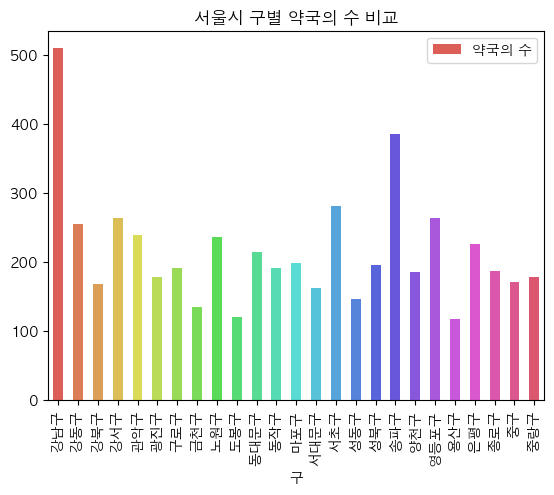

In [42]:
# bar graph
colors = sns.color_palette('hls', len(gu_df))
gu_df.plot(kind='bar', title='서울시 구별 약국의 수 비교', x='구', y='약국의 수', color=colors)
plt.show()

Text(0.5, 1.0, '서울시 구별 약국 수')

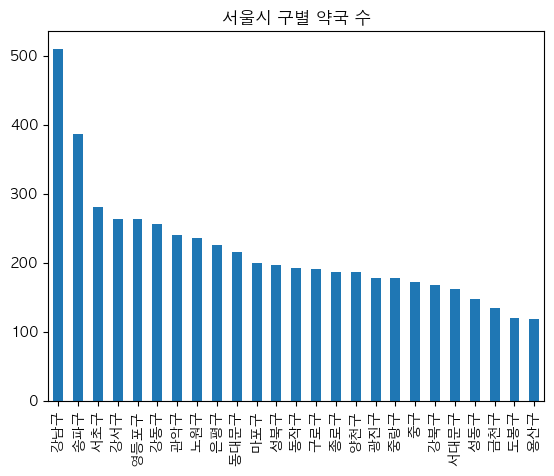

In [48]:
# 더 간단한 방법 
tmp = []
for v in df_fin['주소'].values :
    tmp.append(v.split(' ')[1])
pd.Series(tmp).value_counts().plot(kind='bar')
plt.title('서울시 구별 약국 수')